In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


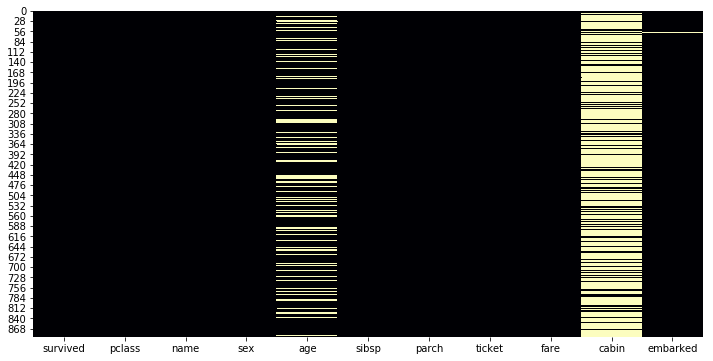

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")


In [7]:
df.drop(['name', 'cabin', 'ticket'], axis=1, inplace=True)

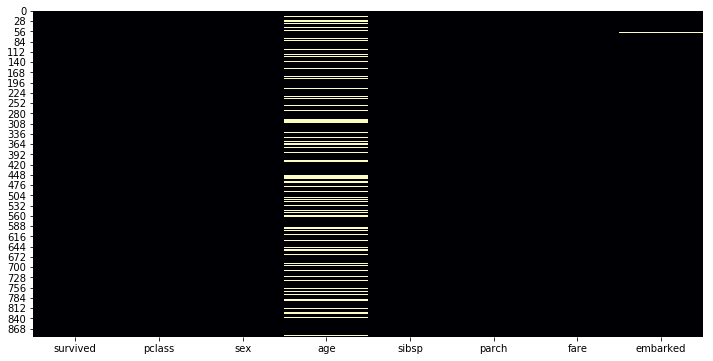

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")

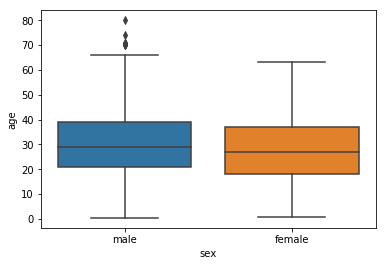

In [9]:
sns.boxplot(x='sex',y='age', data=df)

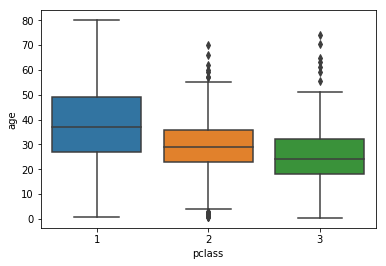

In [10]:
sns.boxplot(x='pclass',y='age', data=df)

In [11]:
df.groupby(by='pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [12]:
def impute_age(row):
    if np.isnan(row['age']):
        if row['pclass'] == 1:
            return 38
        elif row['pclass'] == 2:
            return 29
        else:
            return 25
    return row['age']

In [13]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


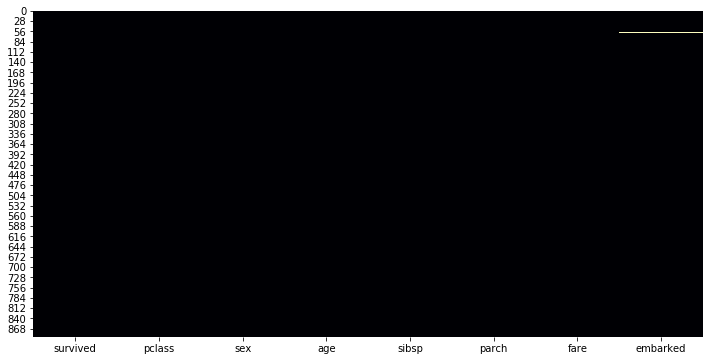

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")

In [16]:
df.dropna(inplace=True)

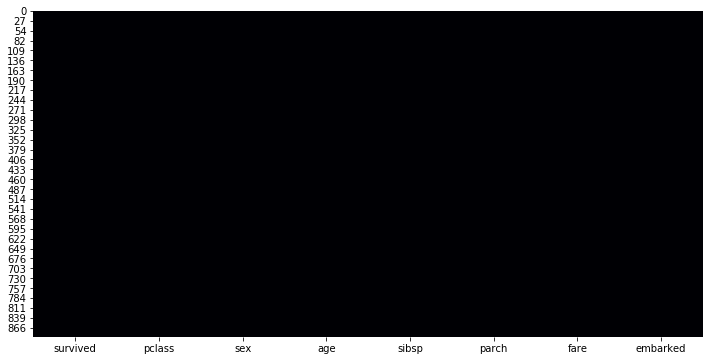

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
dummy_df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [21]:
dummy_df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
y = dummy_df['survived']
X = dummy_df.drop('survived', axis=1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
dummy_df.shape

(889, 9)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lm = LogisticRegression()

In [28]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
test_predictions = lm.predict(X_test)

In [30]:
np.sum(test_predictions == y_test)/y_test.size

0.7982062780269058

In [31]:
np.mean(test_predictions == y_test)

0.7982062780269058

In [32]:
from sklearn.metrics import confusion_matrix

true negatives is`C_{0,0}`, 

false negatives is `C_{1,0}`,

true positives is`C_{1,1}`,

false positives is`C_{0,1}`.


In [33]:
confusion_matrix(y_test, test_predictions)

array([[120,  21],
       [ 24,  58]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, test_predictions))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       141
          1       0.73      0.71      0.72        82

avg / total       0.80      0.80      0.80       223



In [36]:
print(classification_report(y_train, lm.predict(X_train)))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       408
          1       0.77      0.68      0.72       258

avg / total       0.80      0.80      0.80       666



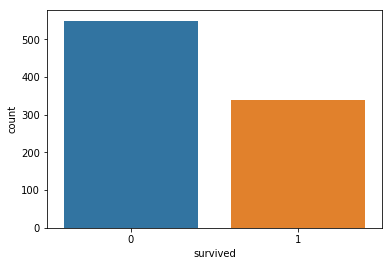

In [37]:
sns.countplot(df['survived'])